### Daniel Dorado y Sofía Álvarez 

In [1]:
# ESAI
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir
import matplotlib.pyplot as plt
from os.path import isfile, join
from scipy.constants import h,c
from scipy.optimize import curve_fit

<h2 align='center'>Laboratorio 1: Rayos X</h2>

### Actividad 1: Rayos X característicos del Cobre
Lo primero que nos interesa es leer los datos y graficar la intensidad en función del ángulo del modo acoplado entre el cristal y el tubo Geiger-Müller.

<b>Tarea 7</b>: No guarde la imagen exporte los datos y realice la gráfica respectiva en su programa
de preferencia.

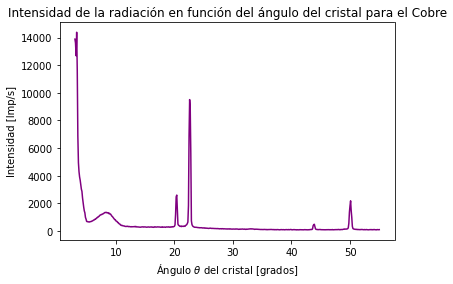

In [2]:
rayos_caracteristicos_Cu = pd.read_csv('Actividad1/Espectro Cu Viernes', sep='\t')
plt.plot(rayos_caracteristicos_Cu['Angulo'], rayos_caracteristicos_Cu['Intensidad'], color='purple')
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación en función del ángulo del cristal para el Cobre')
plt.show()

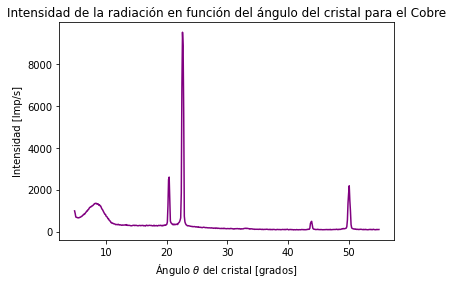

In [3]:
# Amor, ese pico del inicio es como raro, pero supongo yo que es porque ahí es donde inciden horizontalmente. 
# Toca explicar esto.
# Si necesitas otra gráfica sin ese pico inicial, toma los datos a partir de 4.8º (que son normalitos).
# Aquí abajo lo hago:
sin_datos_iniciales = rayos_caracteristicos_Cu[rayos_caracteristicos_Cu['Angulo'] >= 4.8]
plt.plot(sin_datos_iniciales['Angulo'], sin_datos_iniciales['Intensidad'], color='purple')
plt.xlabel(r'Ángulo $\theta$ del cristal [grados]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación en función del ángulo del cristal para el Cobre')
plt.show()

<b> Tarea 8:</b> Use la ley de Bragg para realizar la gráfica de intensidad vs longitud de onda.
<p>La ley de Bragg establece que,</p> $$n\lambda = 2d\sin{\theta}.$$
Debido a que el $n$ varía entre picos (los primeros tienen $n=1$ y, los últimos $n=2$), grafiquemos la intensidad en función de $n\lambda$ (es decir, $d\sin{\theta}$).

In [4]:
d = 2.014*10**-10 

In [5]:
rayos_caracteristicos_Cu['n\lambda'] = 2*d*np.sin(np.radians (rayos_caracteristicos_Cu['Angulo'])) # En Angstrom

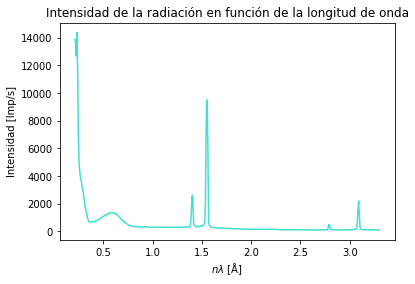

In [6]:
plt.plot(rayos_caracteristicos_Cu['n\lambda']*10**10, rayos_caracteristicos_Cu['Intensidad'], color='turquoise')
plt.xlabel(r'$n\lambda$ [Å]')
plt.ylabel(r'Intensidad [Imp/s]')
plt.title('Intensidad de la radiación en función de la longitud de onda')
plt.show()

**Tarea 9:** Del espectro obtenido para el cristal de LiF, calcule las energías del espectro característico correspondientes para cada uno de los ordenes de difracción. El parámetro de red para el LiF es $d = 2.014 × 10^{−10}$m  con estructura cristalina (110). Compare con los valores reportados en la literatura para el Cu.

Amor, los dos primeros picos son el primer orden de difracción $n=1$ y, los dos últimos, son para $n=2$. Esto nos lo dijo Nicolás, pero si quieres una fuente, te dejo esto: https://www.deanza.edu/faculty/lunaeduardo/documents/CharacteristicXraysofCopper.pdf

Usando la relación $E = h \nu$, podemos calcular la energía del espectro característico correspondiente a cada uno de los picos de intensidad. Note que hay 4 picos, dos correspondientes a $n=1$ (los primeros) y dos para $n=2$ (los dos últimos). 
Combinando la anterior relación y la ley de Bragg, $$E = \frac{n h c}{2 d \sin{\theta}} = \frac{nhc}{\lambda}.$$


Cogemos un rango de acuerdo a los valores teóricos donde deben ocurrir los picos (tabla 1 de la bitácora).

In [7]:
#Amor, avísame si quieres que ponga los puntitos de los picos en la gráfica, aunque se me hace innecesario.
lambda_K_beta_n1 = np.max(rayos_caracteristicos_Cu['n\lambda'][rayos_caracteristicos_Cu['n\lambda'].between(1.3*10**-10, 1.4*10**-10)])
int_beta_n1 = rayos_caracteristicos_Cu['Intensidad'][rayos_caracteristicos_Cu['n\lambda'] == lambda_K_beta_n1]
lambda_K_alpha_n1 = np.max(rayos_caracteristicos_Cu['n\lambda'][rayos_caracteristicos_Cu['n\lambda'].between(1.5*10**-10, 1.6*10**-10)])
int_alpha_n1 = rayos_caracteristicos_Cu['Intensidad'][rayos_caracteristicos_Cu['n\lambda'] == lambda_K_alpha_n1]

lambda_K_beta_n2 =  np.max(rayos_caracteristicos_Cu['n\lambda'][rayos_caracteristicos_Cu['n\lambda'].between(2.5*10**-10, 2.9*10**-10)])
int_beta_n2 = rayos_caracteristicos_Cu['Intensidad'][rayos_caracteristicos_Cu['n\lambda'] == lambda_K_beta_n2]
lambda_K_alpha_n2 =  np.max(rayos_caracteristicos_Cu['n\lambda'][rayos_caracteristicos_Cu['n\lambda'].between(3.0*10**-10*10**-10, 3.5*10**-10)])
int_alpha_n2 = rayos_caracteristicos_Cu['Intensidad'][rayos_caracteristicos_Cu['n\lambda'] == lambda_K_alpha_n2]

lambdas = [lambda_K_beta_n1, lambda_K_alpha_n1, lambda_K_beta_n2, lambda_K_alpha_n2]

In [8]:
def E(n,lambda_): return (n*h*c/lambda_)*6.242*10**18 # Para que quede en eV y poder compararlo con el teorico
E_K_beta_n1 = E(n=1,lambda_=lambda_K_beta_n1)
print('La energía para la línea K_beta a primer orden de difracción n=1 es {}'.format(E_K_beta_n1))
E_K_alpha_n1 = E(n=1,lambda_=lambda_K_alpha_n1)
print('La energía para la línea K_alpha a primer orden de difracción n=1 es {}'.format(E_K_alpha_n1))
E_K_beta_n2 = E(n=2,lambda_=lambda_K_beta_n2)
print('La energía para la línea K_beta a segundo orden de difracción n=2 es {}'.format(E_K_beta_n2))
E_K_alpha_n2 = E(n=2,lambda_=lambda_K_alpha_n2)
print('La energía para la línea K_alpha a primer orden de difracción n=2 es {}'.format(E_K_alpha_n2))

La energía para la línea K_beta a primer orden de difracción n=1 es 8872.828841697952
La energía para la línea K_alpha a primer orden de difracción n=1 es 7751.018520008402
La energía para la línea K_beta a segundo orden de difracción n=2 es 8558.682986936778
La energía para la línea K_alpha a primer orden de difracción n=2 es 7515.822433585848


En el link de arriba están las energías que obtuvieron otras personas con el experimento de PHYWE. En esta imagen, restando la energía entre dos niveles, se pueden encontrar los valores teóricos: <img src='imagenes/energia_transiciones.png'></img>
En el informe, te toca escribir cómo se comparan.


<b>Tarea 10</b>: De los valores que obtuvo para ambos cristales reporte el promedio y desviación
para la linea  $K_\alpha$ y $K_\beta$.

Para $K_\alpha$ tomo el promedio de $\alpha_2$ y $\alpha_1$ porque, por lo general, se ve como un solo pico (si hay mucha resolución, se puede ver como un doblete) --> Está en el preinforme.

In [9]:
valor_teorico_K_alpha = 8978.9 - (951.0 + 931.1)/2
valor_teorico_K_beta = 8978.9 - 73.6
print('El valor teórico de la energía de K_alpha es {:.1f} eV'.format(valor_teorico_K_alpha))
print('El valor teórico de la energía de K_beta es {:.1f} eV'.format(valor_teorico_K_beta))

El valor teórico de la energía de K_alpha es 8037.8 eV
El valor teórico de la energía de K_beta es 8905.3 eV


In [10]:
valor_promedio_K_alpha = np.average([E_K_alpha_n1, E_K_alpha_n2])
valor_promedio_K_beta = np.average([E_K_beta_n1, E_K_beta_n2])
print('El valor promedio de la energía de K_alpha es {:.1f} eV'.format(valor_promedio_K_alpha))
print('El valor promedio de la energía de K_beta es {:.1f} eV'.format(valor_promedio_K_beta))

El valor promedio de la energía de K_alpha es 7633.4 eV
El valor promedio de la energía de K_beta es 8715.8 eV


In [296]:
# No sé bien qué desviación quiere. Me parece raro que sea stdev, pero dijo que no quería error porcentual. 
desv_K_alpha = np.abs(valor_promedio_K_alpha - valor_teorico_K_alpha)
desv_K_beta =  np.abs(valor_promedio_K_beta - valor_teorico_K_beta)

In [12]:
print('La desviación estándar para la energía de la línea K_alpha es {:.1f}'.format(desv_K_alpha))
print('La desviación estándar para la energía de la línea K_beta es {:.1f}'.format(desv_K_beta))

La desviación estándar para la energía de la línea K_alpha es 202.2
La desviación estándar para la energía de la línea K_beta es 94.8


## DUDA: ¿A qué se refiere con desviación?

### Actividad 2: Absorción de rayos X como función del espesor del material


<b>Tarea 6:</b> Para cada longitud de onda (ángulo de incidencia), realice una gráfica semi-logarítmica entre la intensidad (normalizada) y el espesor del material para los materiales que
midió. Encuentre, mediante una regresión, la cantidad $\mu$ para todas las longitudes de onda que midió.


In [13]:
sin_atenuacion = pd.read_csv('Actividad2/Sin material', sep='\t')
al_0_02 = pd.read_csv('Actividad2/Al 0-02', sep='\t')
al_0_06 = pd.read_csv('Actividad2/Al 0-06', sep='\t')
zn_0_025 = pd.read_csv('Actividad2/Zn 0-025', sep='\t')
zn_0_05 = pd.read_csv('Actividad2/Zn 0-05', sep='\t')

In [14]:
sin_atenuacion['n\lambda'] = 2*d*np.sin(np.radians (sin_atenuacion['Angulo'])) # En Angstrom

In [207]:
def func(x, m, b):
    return m*x + b

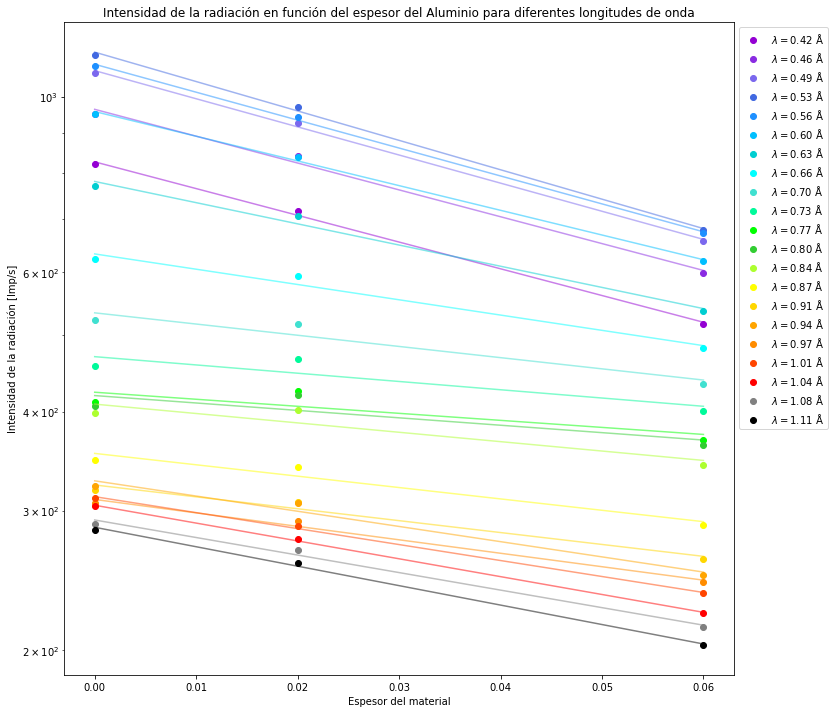

In [43]:
colores = ['darkviolet', 'blueviolet', 'mediumslateblue', 'royalblue', 'dodgerblue', 'deepskyblue', 'darkturquoise', 
           'aqua', 'turquoise', 'mediumspringgreen', 'lime', 'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 
           'darkorange', 'orangered', 'red', 'gray', 'black']

atenuaciones, parametros = [], []
mu_Al = []
for i,lambda_ in enumerate(sin_atenuacion['n\lambda']):
    no_at = 0, sin_atenuacion['Intensidad'][i]
    _0_02 = 0.02, al_0_02['Intensidad'][i]
    _0_06 = 0.06, al_0_06['Intensidad'][i]
    atenuaciones.append((no_at, _0_02, _0_06))
    popt, _ = curve_fit(func, [no_at[0], _0_02[0], _0_06[0]], [np.log(no_at[1]), np.log(_0_02[1]), np.log(_0_06[1])])
    mu_Al.append((np.abs(popt[0]), lambda_))
    parametros.append(popt)
    
x = np.linspace(0, 0.06, len(parametros))
y = []
for i,params in enumerate(parametros):
    y.append(np.exp(params[1])*np.exp(params[0]*x))

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
for i,a in enumerate(atenuaciones):
    plt.semilogy([a[0][0], a[1][0], a[2][0]], [a[0][1], a[1][1], a[2][1]], 'o', color=colores[i], label=r'$\lambda=${:.2f} Å'.format(sin_atenuacion['n\lambda'][i]*10**10))
    plt.plot(x, y[i], color=colores[i], alpha=0.5)

    
plt.xlabel(r'Espesor del material')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(r'Intensidad de la radiación en función del espesor del Aluminio para diferentes longitudes de onda')
plt.show()


Los valores de $\mu$ para el Aluminio se presentan a continuación,

In [44]:
for mu in mu_Al:
    print(mu)

(7.769850798886939, 4.210406500421082e-11)
(7.804714121178724, 4.5598254505712826e-11)
(8.175576295275029, 4.90889715235934e-11)
(8.54660934756784, 5.2575950226236776e-11)
(8.115511624206455, 5.605892506671436e-11)
(7.17664732087654, 5.953763080300716e-11)
(6.158951755464434, 6.301180251820499e-11)
(4.443014670421748, 6.648117564068096e-11)
(3.255551488179381, 6.994548596423954e-11)
(2.403971647033871, 7.3404469668237e-11)
(2.044567166810236, 7.685786333767225e-11)
(2.155333149013446, 8.030540398324702e-11)
(2.727305284552042, 8.374682906139347e-11)
(3.306749896167953, 8.718187649426784e-11)
(3.4580790080876143, 9.061028468970882e-11)
(4.4206765391939395, 9.403179256115869e-11)
(3.910261222644063, 9.744613954754616e-11)
(4.641052980459273, 1.0085306563312901e-10)
(5.188045755651966, 1.0425231136729536e-10)
(5.095763063754995, 1.0764361788432185e-10)
(5.652952313389759, 1.1102672692308727e-10)


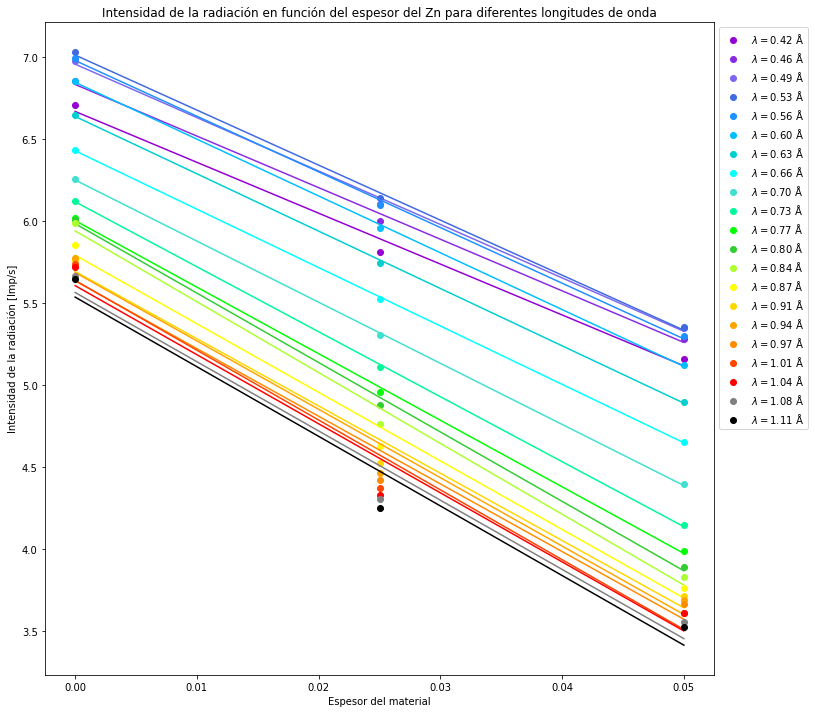

In [47]:
atenuaciones, parametros, mu_Zn = [], [], []
for i,lambda_ in enumerate(sin_atenuacion['n\lambda']):
    no_at = 0, sin_atenuacion['Intensidad'][i]
    _0_025 = 0.025, zn_0_025['Intensidad'][i]
    _0_05 = 0.05, zn_0_05['Intensidad'][i]
    atenuaciones.append((no_at, _0_025, _0_05))
    popt, _ = curve_fit(func, [no_at[0], _0_025[0], _0_05[0]], [np.log(no_at[1]), np.log(_0_025[1]), np.log(_0_05[1])])
    mu_Zn.append((np.abs(popt[0]), lambda_))
    parametros.append(popt)
    
x = np.linspace(0, 0.05, len(parametros))
y = []
for params in parametros:
    y.append(np.exp(params[1])*np.exp(params[0]*x))

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
for i,a in enumerate(atenuaciones):
    plt.plot([a[0][0], a[1][0], a[2][0]], [np.log(a[0][1]), np.log(a[1][1]), np.log(a[2][1])], 'o', color=colores[i], label=r'$\lambda=${:.2f} Å'.format(sin_atenuacion['n\lambda'][i]*10**10))
    #plt.plot(x, y[i], color=colores[i], alpha=0.5)
    plt.plot(x, parametros[i][0]*x + parametros[i][1], color=colores[i])

    
plt.xlabel(r'Espesor del material')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(r'Intensidad de la radiación en función del espesor del Zn para diferentes longitudes de onda')
plt.show()

Los valores de $\mu$ para el Zinc son,

In [48]:
for mu in mu_Zn:
    print(mu)

(31.02935620475816, 4.210406500421082e-11)
(31.46516511713197, 4.5598254505712826e-11)
(32.58481076574338, 4.90889715235934e-11)
(33.56229556460654, 5.2575950226236776e-11)
(33.94897584309525, 5.605892506671436e-11)
(34.64996008739971, 5.953763080300716e-11)
(34.97101429793641, 6.301180251820499e-11)
(35.611723364207435, 6.648117564068096e-11)
(37.264368683614364, 6.994548596423954e-11)
(39.630973290053305, 7.3404469668237e-11)
(40.59218336802916, 7.685786333767225e-11)
(42.33985773253931, 8.030540398324702e-11)
(43.20640038104513, 8.374682906139347e-11)
(41.82004724708348, 8.718187649426784e-11)
(41.03238063732255, 9.061028468970882e-11)
(41.71344187925117, 9.403179256115869e-11)
(41.26572202915105, 9.744613954754616e-11)
(42.57749991962409, 1.0085306563312901e-10)
(42.122195775239945, 1.0425231136729536e-10)
(42.22157264796541, 1.0764361788432185e-10)
(42.45227427090091, 1.1102672692308727e-10)


<b>Tarea 7:</b> Realice una gráfica entre ($\mu/\rho$) y $\lambda$, siendo $\rho$ la densidad de masa del material
usado. ¿Obtiene una recta como era de esperarse? Si no obtiene una recta, ¿qué exponente obtiene para $\lambda$?


In [55]:
rho_Al = 2.699 # kg/m^3
rho_Zn = 7.133 # kg/m^3


x_Al = np.array(mu_Al)/rho_Al
x_Zn = np.array(mu_Zn)/rho_Zn


In [56]:
# Para el Aluminio
vals_mu_Al, vals_lambda = [i[0] for i in mu_Al], [i[1]**3 for i in mu_Al] 
# Para el Zinc
vals_mu_Zn, vals_lambda = [i[0] for i in mu_Zn], [i[1]**3 for i in mu_Zn] 

In [59]:
print(vals_lambda, sin_atenuacion['n\lambda'])

[7.464007764942099e-32, 9.480792788378718e-32, 1.1829102623074134e-31, 1.4533204740011573e-31, 1.76170950555712e-31, 2.1104479517413074e-31, 2.501875589135043e-31, 2.9382995761845605e-31, 3.4219926758613747e-31, 3.955191502166513e-31, 4.540094791695229e-31, 5.178861701461748e-31, 5.8736101341654e-31, 6.626415092060859e-31, 7.43930706057545e-31, 8.31427042279608e-31, 9.253241905927246e-31, 1.025810906079952e-30, 1.133070877548533e-30, 1.2472825824055444e-30, 1.3686191451485295e-30] 0     4.210407e-11
1     4.559825e-11
2     4.908897e-11
3     5.257595e-11
4     5.605893e-11
5     5.953763e-11
6     6.301180e-11
7     6.648118e-11
8     6.994549e-11
9     7.340447e-11
10    7.685786e-11
11    8.030540e-11
12    8.374683e-11
13    8.718188e-11
14    9.061028e-11
15    9.403179e-11
16    9.744614e-11
17    1.008531e-10
18    1.042523e-10
19    1.076436e-10
20    1.110267e-10
Name: n\lambda, dtype: float64


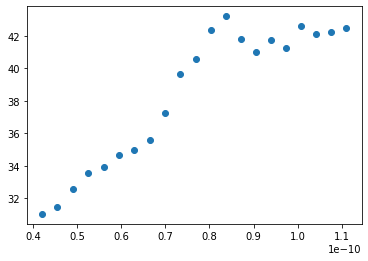

In [54]:
plt.scatter(vals_lambda, vals_mu_Zn)

### Actividad 3:  Dependencia de la intensidad del voltaje y corriente del ánodo.


#### Miramos primero voltaje variable

In [274]:
voltaje_variable = pd.read_csv('Actividad3/Voltaje-variable', sep='\t')
voltaje_variable.drop('Unnamed: 14', axis=1, inplace=True)

Podemos usar $n=1$ por el rango de ángulos que estamos usando.

In [275]:
voltaje_variable['\lambda'] = 2*d*np.sin(np.radians (voltaje_variable['Angulo'])) # En Angstrom

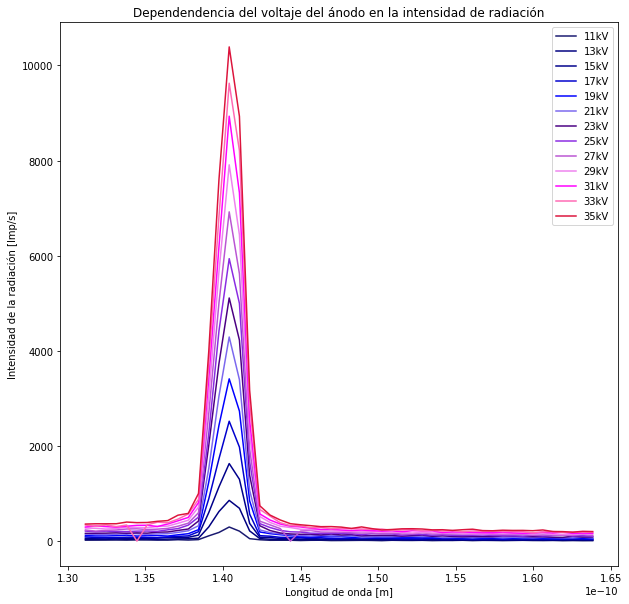

In [276]:
plt.figure(figsize=(10,10))
i = 0
columnas_voltaje_variable = []
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in voltaje_variable.columns: 
    if column != 'Angulo' and column != '\lambda':
        plt.plot(voltaje_variable['\lambda'], voltaje_variable[column], color=colors[i], label=column)
        columnas_voltaje_variable.append(column)
        i += 1
plt.xlabel(r'Longitud de onda [m]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Dependendencia del voltaje del ánodo en la intensidad de radiación')
plt.show()

# ESTA ES K_ALPHA. SALIÓ MAL POR LA CALIBRACIÓN DEL EQUIPO.

In [277]:
# Los parámetros son:
I_A = 1 #mA
U_K = 9.979 #keV

Tomemos para una longitud de onda $\lambda$ determinada (el pico en este caso) los valores de intensidad y veamos si se ajustan a la función $I = bI_A (U_A - U_K)^{3/2}$

In [278]:
def intensity(U_A, b):
    I_A = 1 #mA
    U_K = 9.979 #keV
    return b*I_A*(U_A - U_K)**(3/2)

In [279]:
intensidades_maximas = voltaje_variable[columnas_voltaje_variable].max()
lambda_max = voltaje_variable['\lambda'][voltaje_variable[columnas_voltaje_variable].idxmax()]
voltajes = [i for i in range(11, 36, 2)]

In [282]:
popt, _ = curve_fit(intensity, voltajes, intensidades_maximas)
popt_lin, pcov_lin = curve_fit(func, voltajes, intensidades_maximas)

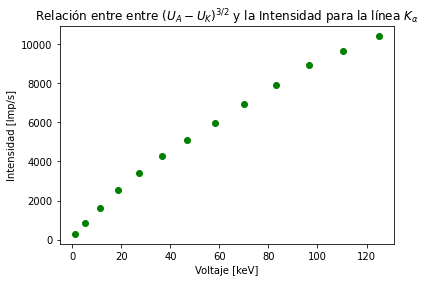

In [293]:
plt.scatter((np.array(voltajes) - U_K)**(3/2), intensidades_maximas, color='green')
plt.xlabel('Voltaje [keV]')
plt.ylabel('Intensidad [Imp/s]')
plt.title(r'Relación entre entre $(U_A - U_K)^{3/2}$ y la Intensidad para la línea $K_{\alpha}$')
plt.show()

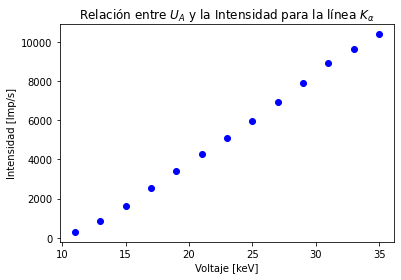

In [295]:
plt.scatter(voltajes, intensidades_maximas, color='blue')
plt.xlabel('Voltaje [keV]')
plt.ylabel('Intensidad [Imp/s]')
plt.title(r'Relación entre $U_A$ y la Intensidad para la línea $K_\alpha$')
plt.show()

In [174]:
print('El valor de b es de b={}'.format(popt[0]))

El valor de b es de b=92.2721440088926


In [256]:
# Para corriente variable
corriente_variable = pd.read_csv('Actividad3/Corriente variable/0-1mA', sep='\t')
files = sorted([f for f in listdir('Actividad3/Corriente variable') if isfile(join('Actividad3/Corriente variable', f))])
for f in files:
    if isfile(join('Actividad3/Corriente variable', f)) and f != '0-1mA':
        corriente = f[-3]
        if corriente != '1':
            corriente_variable['0.'+corriente+'mA'] = pd.read_csv(join('Actividad3/Corriente variable', f), sep='\t')['0.'+corriente+'mA']
        else:
            corriente_variable[corriente+'mA'] = pd.read_csv(join('Actividad3/Corriente variable', f), sep='\t')[corriente+'mA']


In [257]:
corriente_variable['\lambda'] = 2*d*np.sin(np.radians (corriente_variable['Angulo'])) # En Angstrom

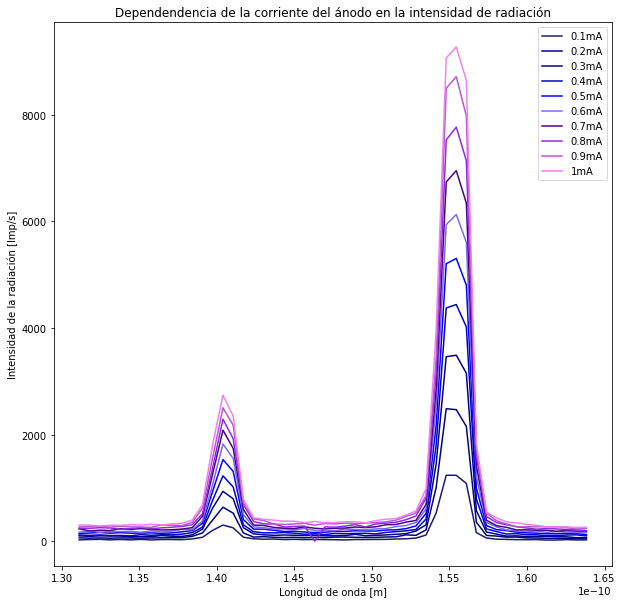

In [258]:
plt.figure(figsize=(10,10))
i = 0
columnas_corriente_variable = []
colors = ['midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'mediumslateblue', 'indigo', 'blueviolet', 'mediumorchid', 'violet', 'fuchsia', 'hotpink', 'crimson']
for column in corriente_variable.columns: 
    if column != 'Angulo' and column != '\lambda':
        plt.plot(corriente_variable['\lambda'], corriente_variable[column], color=colors[i], label=column)
        columnas_corriente_variable.append(column)
        i += 1
plt.xlabel(r'Longitud de onda [m]')
plt.ylabel('Intensidad de la radiación [Imp/s]')
plt.legend()
plt.title('Dependendencia de la corriente del ánodo en la intensidad de radiación')
plt.show()

In [269]:
def intensity(I_A, b):
    U_A = 35 #keV
    U_K = 9.979 #keV
    return b*I_A*(U_A - U_K)**(3/2)

In [270]:
intensidades_maximas = corriente_variable[columnas_corriente_variable].max()
lambda_max = corriente_variable['\lambda'][corriente_variable[columnas_corriente_variable].idxmax()]
i = 0.1
corrientes = []
while i <= 1:
    corrientes.append(np.round(i, 1))
    i += 0.1

In [271]:
U_A = 35
popt, pcov = curve_fit(intensity, corrientes, intensidades_maximas)

In [272]:
# Ahora, hacemos un ajuste lineal
popt_lin_kalph, pcov_lin_kalph = curve_fit(func, corrientes, intensidades_maximas)

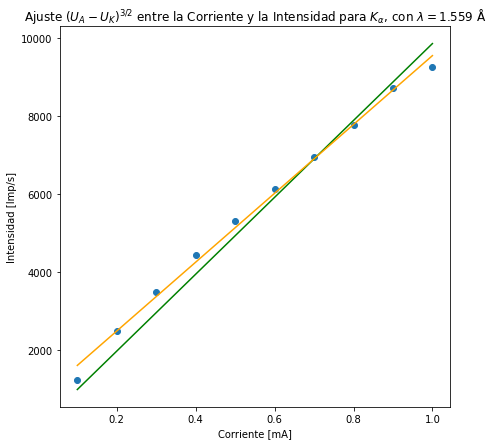

In [273]:
plt.figure(figsize=(7,7))
plt.scatter(corrientes, intensidades_maximas)
plt.plot(np.array(corrientes), popt[0]*np.array(corrientes)*(U_A - U_K)**(3/2), color='g')
plt.plot(np.array(corrientes), popt_lin_kalph[0]*np.array(corrientes) + popt_lin_kalph[1], color='orange')
plt.xlabel('Corriente [mA]')
plt.ylabel('Intensidad [Imp/s]')
plt.title(r'Ajuste $(U_A - U_K)^{3/2}$ entre la Corriente y la Intensidad para $K_\alpha$, con $\lambda=1.559$ Å')
plt.show()

In [244]:
print('El valor de b para el que va como 3/2 es de b={}'.format(popt[0]))
print('El valor de b para el lineal es de b={}'.format(popt[0]))

El valor de b es de b=78.82844751468728


In [232]:
print('El valor de b es de b={}'.format(popt[0]))

El valor de b es de b=8835.212124434345


In [249]:
pcov

array([[ 46487.26910541, -25567.99820083],
       [-25567.99820083,  17897.59899991]])

<b>Actividad 7 y 8:</b>

In [250]:
# Amor, de hecho, esta gráfica que hice arriba es la de K_alpha. Voy a hacer ahora la de K_beta.
corriente_variable = corriente_variable[corriente_variable['\lambda'] < 1.45*10**(-10)]
intensidades_maximas = corriente_variable[columnas_corriente_variable].max()
lambda_max = corriente_variable['\lambda'][corriente_variable[columnas_corriente_variable].idxmax()]

In [253]:
U_A = 35
popt, pcov = curve_fit(intensity, corrientes, intensidades_maximas)

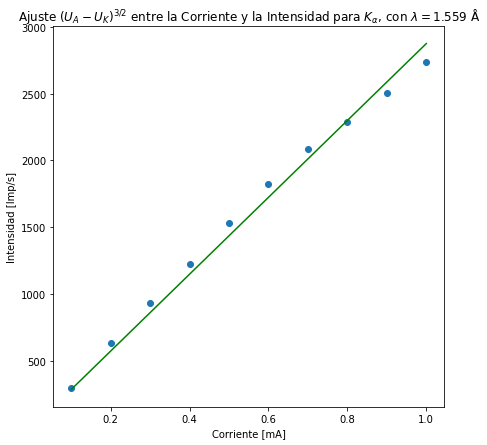

In [254]:
plt.figure(figsize=(7,7))
plt.scatter(corrientes, intensidades_maximas)
plt.plot(np.array(corrientes), popt[0]*np.array(corrientes)*(U_A - U_K)**(3/2), color='g')
plt.xlabel('Corriente [mA]')
plt.ylabel('Intensidad [Imp/s]')
plt.title(r'Ajuste $(U_A - U_K)^{3/2}$ entre la Corriente y la Intensidad para $K_\alpha$, con $\lambda=1.559$ Å')
plt.show()

In [255]:
pcov

array([[0.11801498]])

In [ ]:
# Y ahora hacemos el ajuste lineal